# Compare 1D and 2D model output

This notebook show examples of how to use the `Compare1D2D` utility to produce figures and tables.  

## Reading 1D and 2D output
Model output can be quite large, so we only want to read output once. In this notebook, we assume the utility has already initialised and `1D_H.csv`, `2D_H.csv` files are already generated. However, see the commented-out code on how to generate these csv files from netCDF model output. 

In [1]:
from fm2prof import Project, utils

project = Project(fr'../../tests/test_data/compare1d2d/cases/case1/fm2prof.ini')

# To convert model output to csv files, initialise like this:
"""
plotter = utils.Compare1D2D(project=project, 
                           path_1d='../path/to/dir/that/contains/dimr.xml',
                           path_2d='../path/to/his/netcdf/file' )  
"""

# The minimal information you need to provide is an fm2prof config file. 
plotter = utils.Compare1D2D(project=project)

╔═════╣ 2024-05-06 20:11 Starting new task: Loading configuration file
║     DEBUG  T+ 0.02s Received ini file: ..\..\tests\test_data\compare1d2d\cases\case1\fm2prof.ini
║     ERROR  T+ 0.05s Could not find input file: 2DMapOutput
║     ERROR  T+ 0.08s Unexpected error reading input files. Check config file
║   WARNING  T+ 0.16s exportmapfiles is not a known key
║     ERROR  T+ 0.18s Unexpected error reading (debug) parameters. Check config file
╚═════╣ Task finished in 0.20sec
FM2PROF version 2.3.2
Documentation: https://deltares.github.io/Fm2Prof/
Authors: Koen Berends, Asako Fujisaki, Carles Soriano Perez, Ilia Awakimjan
Contact: koen.berends@deltares.nl
License:   LPGL license. For more info see LICENSE.txt
Copyright 2016-2020, University of Twente & Deltares

[input]
2DMapOutput                   =           # Output file from FM2D model (.net file)
CrossSectionLocationFile      =           # .csv or .txt file (, as delimiter) that contains four columns: X_coordinate,Y_coordinate,

## Showing results along a route

The example data contains results for the Rijn river. A route along the Rhine we might inspect is the Bovenrijn (BR) to Waal (WL). Below, we set `savefig=False`, so that the figure renders in the notebook. If you set `savefig=True`, it will save as a png to the `project` output folder. 

║   WARNING  T+ 2.29s skipped labelling BR_863.9_R_LMW-H_Lobith-haven because too close to previous station


FigureOutput(fig=<Figure size 1200x1200 with 2 Axes>, axes=array([<Axes: title={'center': 'route: BR-WL'}, xlabel='Rivierkilometers', ylabel='Waterstand [m+NAP]'>,
       <Axes: xlabel='Rivierkilometers', ylabel='Verschil 1D-2D [m]'>],
      dtype=object), legend=<matplotlib.legend.Legend object at 0x00000229E4BD0A10>)

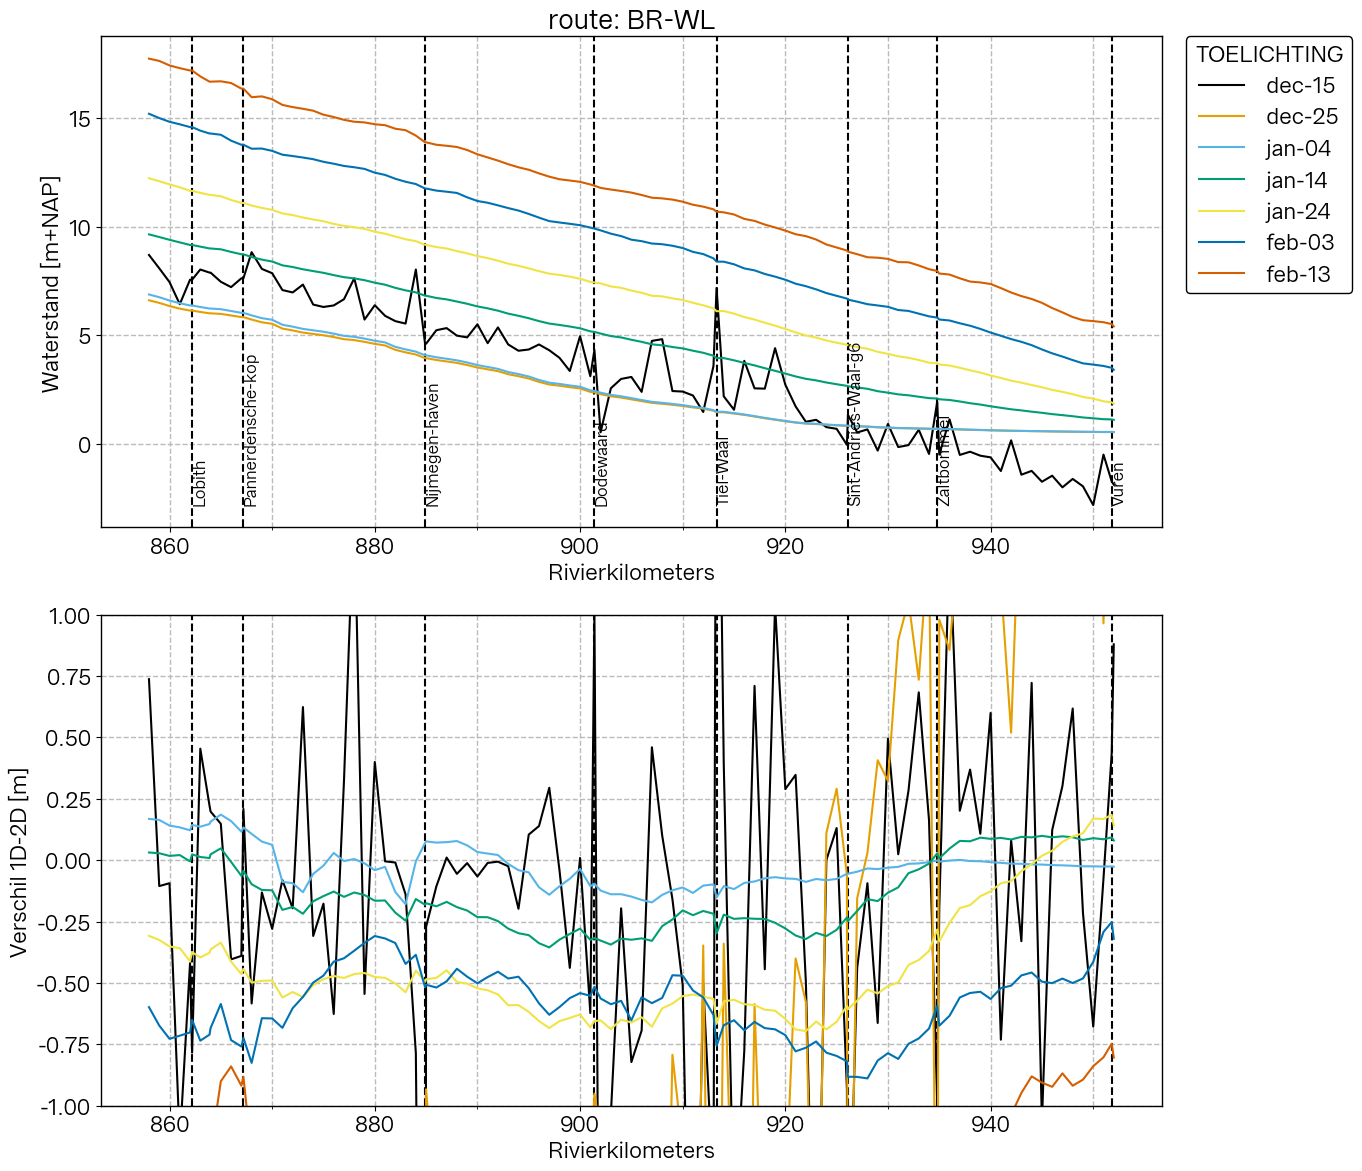

In [2]:
plotter.figure_longitudinal(route=["BR", "WL"], savefig=False)

These results show that the first shown time is not really initialised very well. In fact, for this simulations it makes sense to start showing results only from January 1st. We can do this by giving the plotter a start time:

║   WARNING  T+ 4.29s skipped labelling BR_863.9_R_LMW-H_Lobith-haven because too close to previous station


FigureOutput(fig=<Figure size 1200x1200 with 2 Axes>, axes=array([<Axes: title={'center': 'route: BR-WL'}, xlabel='Rivierkilometers', ylabel='Waterstand [m+NAP]'>,
       <Axes: xlabel='Rivierkilometers', ylabel='Verschil 1D-2D [m]'>],
      dtype=object), legend=<matplotlib.legend.Legend object at 0x00000229E6B97E50>)

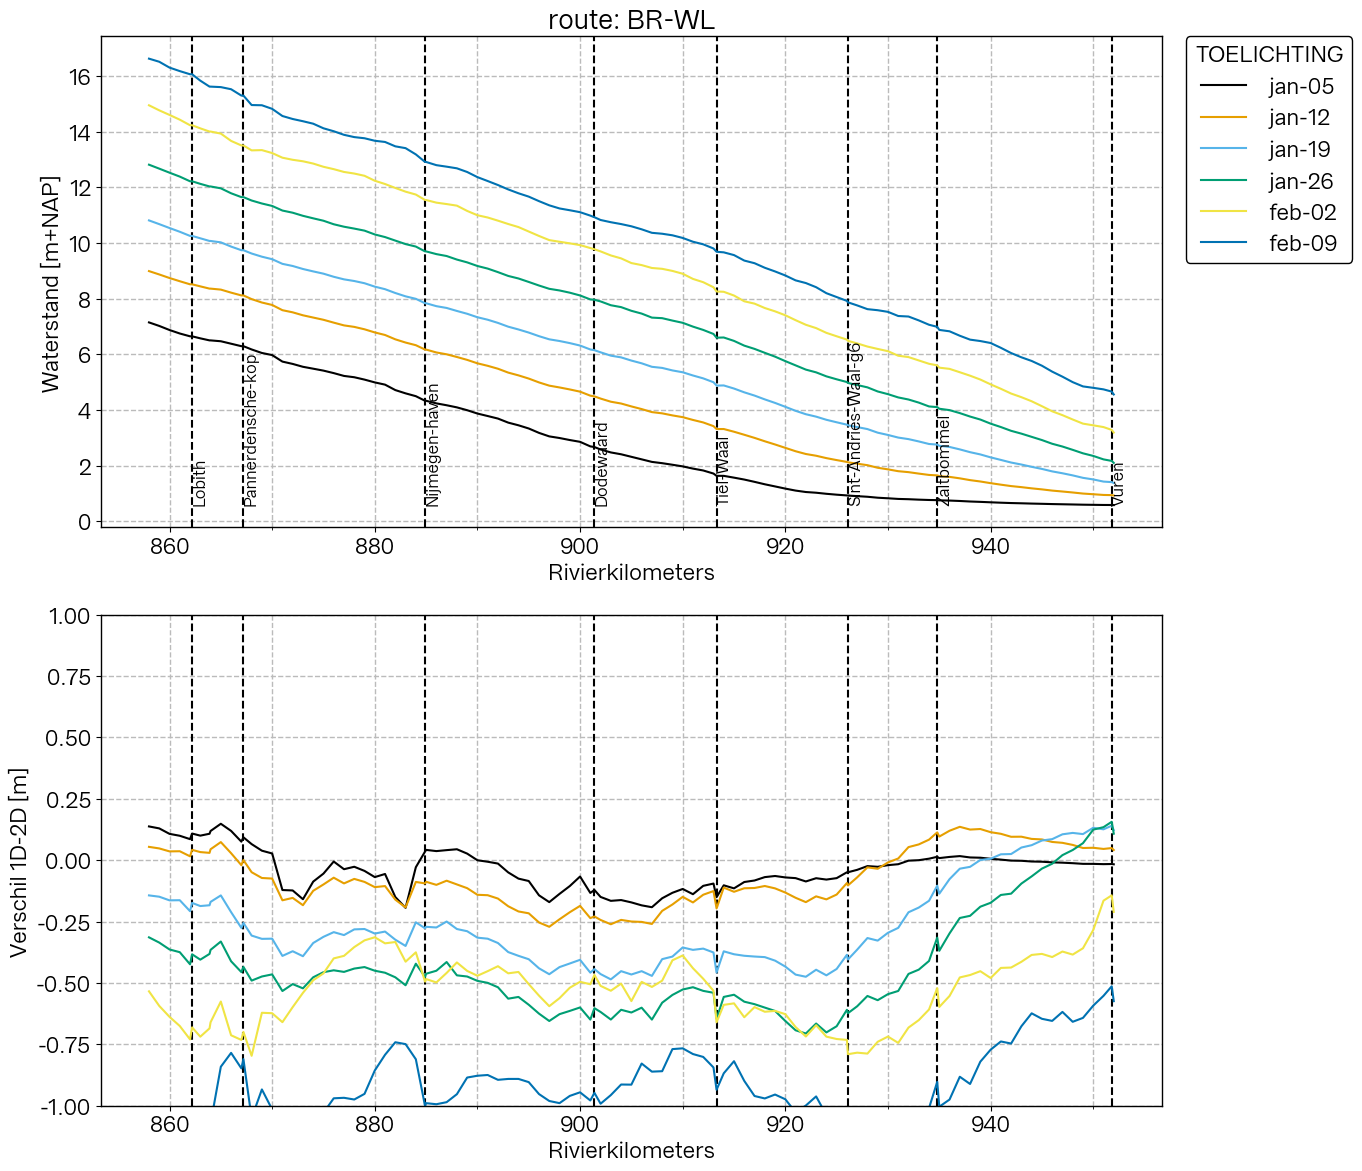

In [3]:
from datetime import datetime

plotter.start_time = datetime(year=2000, month=1, day=5)
plotter.figure_longitudinal(route=["BR", "WL"], savefig=False)

## Combining multiple simulations in a single graph

To show the results of multiple simulations, it makes sense to plot a single line per simulation. Two available stats are implemented: `max13` plots the average of the 13 highest values for each location, which makes sense for a Dynamic standard simulation. The `last25` shows the average of the last 25 output, which makes most sense for a steady simulation. 

║      INFO  T+ 362.74s Starting new task: Loading configuration file
║     DEBUG  T+ 362.76s Received ini file: ..\..\tests\test_data\compare1d2d\cases\case1\fm2prof.ini
║     ERROR  T+ 362.78s Could not find input file: 2DMapOutput
║     ERROR  T+ 362.79s Unexpected error reading input files. Check config file
║   WARNING  T+ 362.87s exportmapfiles is not a known key
║     ERROR  T+ 362.90s Unexpected error reading (debug) parameters. Check config file
║      INFO  T+ 362.93s 
║      INFO  T+ 362.97s ================================================================================
║      INFO  T+ 363.00s FM2PROF version 2.3.2
║      INFO  T+ 363.02s Documentation: https://deltares.github.io/Fm2Prof/
║      INFO  T+ 363.03s Authors: Koen Berends, Asako Fujisaki, Carles Soriano Perez, Ilia Awakimjan
║      INFO  T+ 363.07s Contact: koen.berends@deltares.nl
║      INFO  T+ 363.08s License:   LPGL license. For more info see LICENSE.txt
║      INFO  T+ 363.10s Copyright 2016-2020, Universi

FigureOutput(fig=<Figure size 1200x1200 with 2 Axes>, axes=array([<Axes: title={'center': 'route: BR-PK-IJ'}, xlabel='Rivierkilometers', ylabel='Waterstand [m+NAP]'>,
       <Axes: xlabel='Rivierkilometers', ylabel='Verschil 1D-2D [m]'>],
      dtype=object), legend=<matplotlib.legend.Legend object at 0x00000229D9C26CD0>)

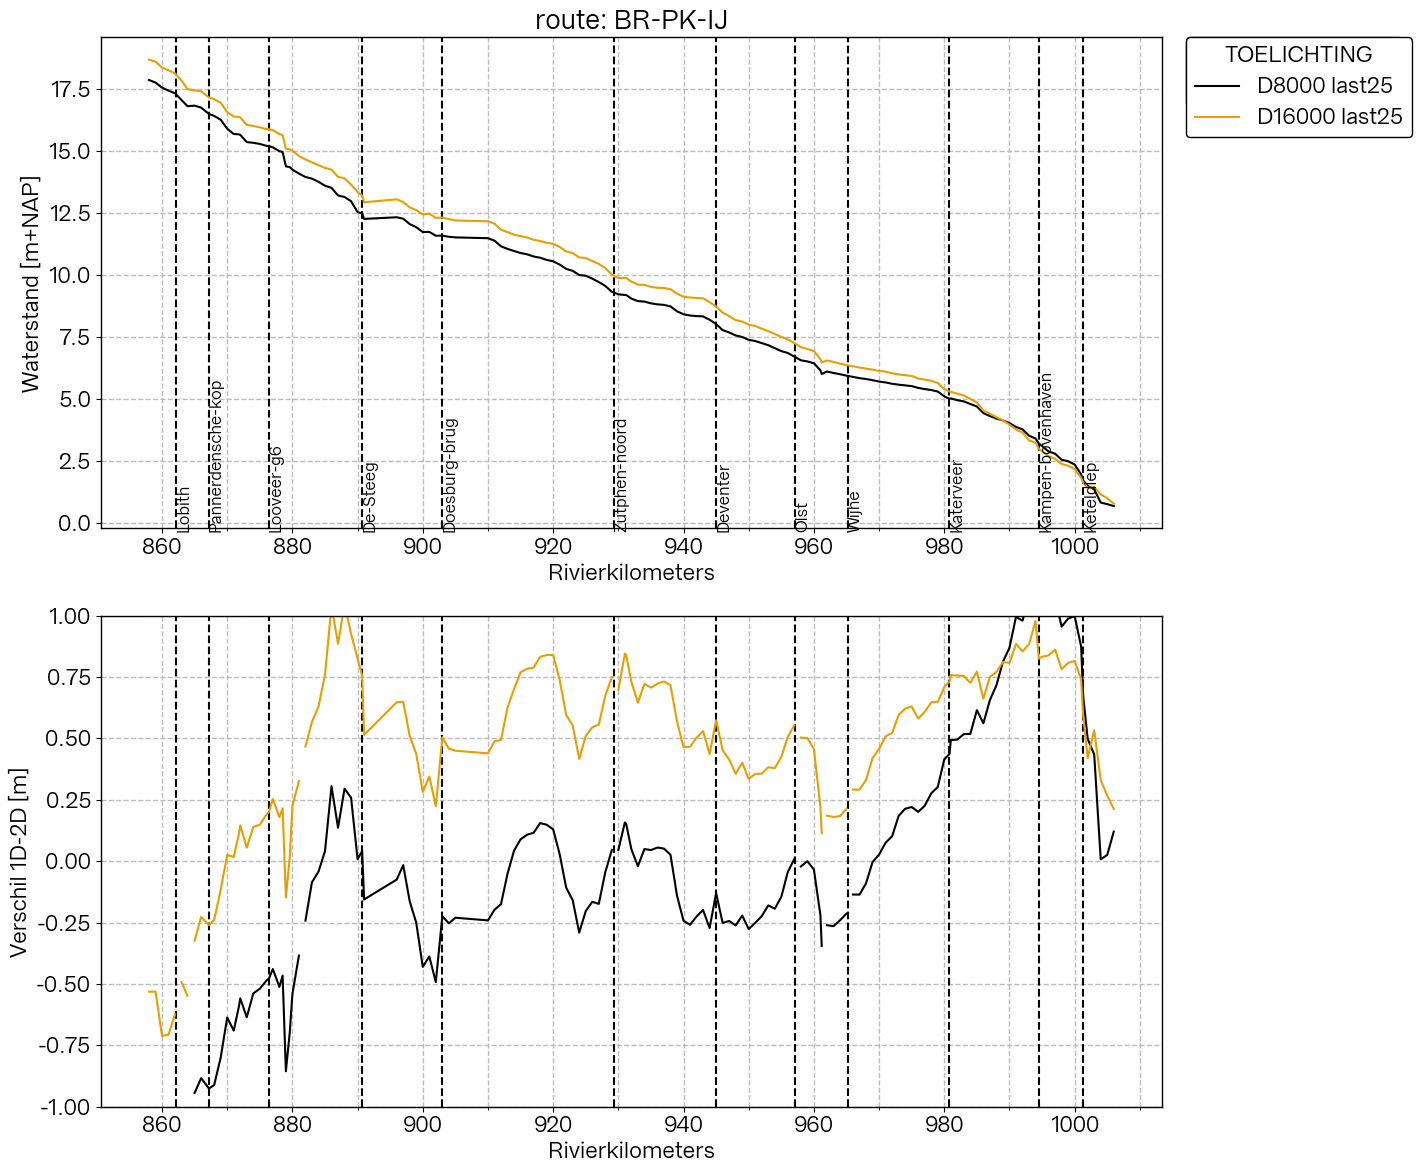

In [8]:
# Loading output from two sources
project = Project(fr'../../tests/test_data/compare1d2d/cases/case1/fm2prof.ini')
project2 = Project(fr'../../tests/test_data/compare1d2d/cases/case2/fm2prof.ini')

plotter = utils.Compare1D2D(project=project,
                            start_time=datetime(year=2000, month=1, day=5))
plotter2 = utils.Compare1D2D(project=project2,
                            start_time=datetime(year=2000, month=1, day=5))

# Where setting savefig to False to get the Figure outptu
Figure = plotter.figure_longitudinal(route=['BR', "PK", "IJ"], 
                                     stat="last25", 
                                     label = "D8000",
                                     savefig=False)

# The second potter takes the `FigureOutput` from the first plotter as argument for the `add_to_fig` parameter. 
plotter2.figure_longitudinal(route=['BR', "PK", "IJ"], 
                             stat="last25", 
                             label = "D16000",
                             savefig=False,
                             add_to_fig=Figure)

## Showing results for a single station

To compare results at a single station, use the following method

FigureOutput(fig=<Figure size 1200x500 with 2 Axes>, axes=<Axes: title={'center': 'WL_900.00\nTijdreeks'}, ylabel='Waterstand [m+NAP]'>, legend=<matplotlib.legend.Legend object at 0x00000229E6662C50>)

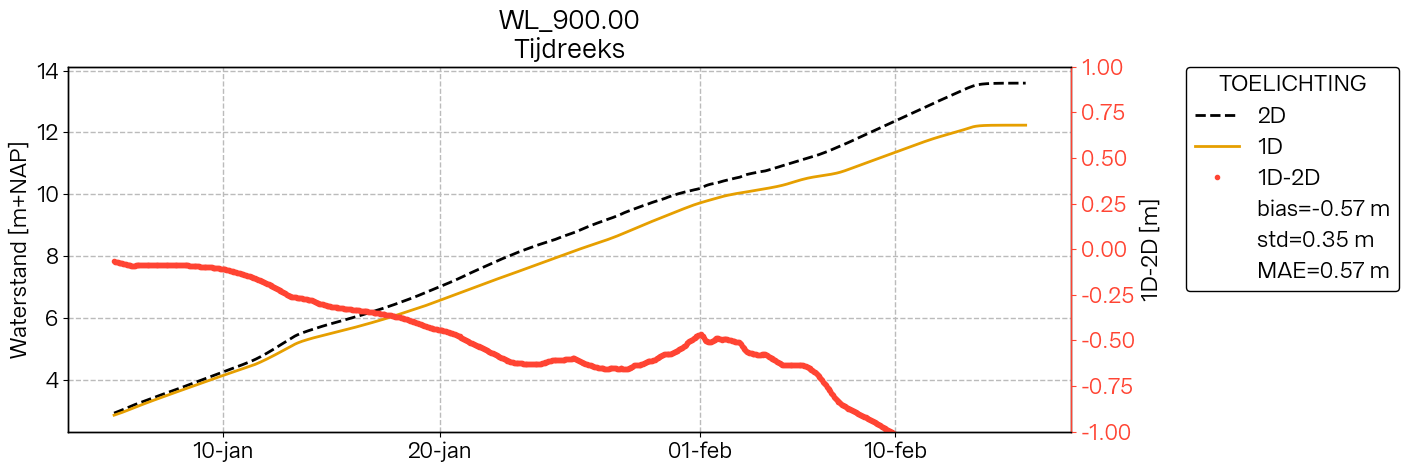

In [4]:
plotter.figure_at_station("WL_900.00", savefig=False)

If you are not sure what stations are available, use the `stations` method to list all stations. The code below returns all stations that contain the abbreviation "WL"

In [5]:
[station for station in plotter.stations() if "WL" in station]

['WL_914.00',
 'WL_915.00',
 'WL_916.00',
 'WL_917.00',
 'WL_918.00',
 'WL_919.00',
 'WL_920.00',
 'WL_921.00',
 'WL_922.00',
 'WL_923.00',
 'WL_924.00',
 'WL_925.00',
 'WL_926.00',
 'WL_927.00',
 'WL_928.00',
 'WL_929.00',
 'WL_930.00',
 'WL_931.00',
 'WL_932.00',
 'WL_933.00',
 'WL_934.00',
 'WL_935.00',
 'WL_936.00',
 'WL_937.00',
 'WL_938.00',
 'WL_939.00',
 'WL_940.00',
 'WL_941.00',
 'WL_942.00',
 'WL_943.00',
 'WL_944.00',
 'WL_945.00',
 'WL_946.00',
 'WL_947.00',
 'WL_948.00',
 'WL_949.00',
 'WL_950.00',
 'WL_951.00',
 'WL_952.00',
 'WL_926.1_L_LMW-H_Sint-Andries-Waal-g6',
 'WL_934.8_L_LMW-H_Zaltbommel',
 'WL_951.8_R_LMW-H_Vuren',
 'WL_867.00',
 'WL_913.3_R_LMW-H_Tiel-Waal',
 'WL_868.00',
 'WL_869.00',
 'WL_870.00',
 'WL_871.00',
 'WL_872.00',
 'WL_873.00',
 'WL_874.00',
 'WL_875.00',
 'WL_876.00',
 'WL_877.00',
 'WL_878.00',
 'WL_879.00',
 'WL_880.00',
 'WL_881.00',
 'WL_882.00',
 'WL_883.00',
 'WL_884.00',
 'WL_885.00',
 'WL_886.00',
 'WL_887.00',
 'WL_888.00',
 'WL_889.00',
